# **Stroke Survival Prediction**
### What are the potential outcomes of someone experiencing an acute stroke at the end of a 6-month period?

In [1]:
# Import required dependencies
import pandas as pd
import pipeline_utilities as util
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaned Sourcing
#### The cleaning process was documented in a seperate file.
 1. Handle missing values.
 2. Handle dublicate rows.
 3. Replacing nan values.
 4. Dropping columns.


In [2]:
# Importing the data
stroke_trials_df = pd.read_csv(r"Resources\final_cleaned_stroke_six_month_dead_alive_data.csv")
stroke_trials_df

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RSBP,RCONSC,RDEF1,RDEF2,...,DCAREND,DTHROMB,DNOSTRK,DRSISC,DRSH,DRSUNK,DPE,DALIVE,CNTRYNUM,OCCODE
0,M,69,Y,C,Y,Y,140,D,N,N,...,U,U,N,N,N,U,N,N,27,1
1,F,71,N,C,Y,N,170,F,Y,Y,...,U,U,N,N,N,U,N,Y,27,1
2,M,54,N,C,Y,N,135,F,Y,Y,...,U,U,N,N,N,U,N,Y,27,1
3,F,77,N,C,N,N,140,F,Y,Y,...,U,U,Y,N,N,U,N,N,27,1
4,M,81,Y,C,N,N,170,F,N,N,...,U,U,N,N,N,U,N,Y,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,F,86,N,Y,N,N,120,F,Y,Y,...,N,N,N,N,N,N,N,Y,27,1
9556,M,63,Y,N,Y,Y,150,F,Y,Y,...,N,N,N,N,N,N,N,Y,15,1
9557,M,66,N,N,Y,Y,120,F,Y,Y,...,N,N,N,N,N,N,N,N,27,1
9558,M,77,N,N,Y,N,220,F,Y,Y,...,N,N,N,Y,N,N,N,Y,15,1


# Data Exploration and Transformation
* Encoding categorical variables.
* Using statical methods.
* Checking the correlated features.





In [3]:
# Printing the data info
print(stroke_trials_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       9560 non-null   object 
 1   AGE       9560 non-null   int64  
 2   RSLEEP    9560 non-null   object 
 3   RATRIAL   9560 non-null   object 
 4   RCT       9560 non-null   object 
 5   RVISINF   9560 non-null   object 
 6   RSBP      9560 non-null   int64  
 7   RCONSC    9560 non-null   object 
 8   RDEF1     9560 non-null   object 
 9   RDEF2     9560 non-null   object 
 10  RDEF3     9560 non-null   object 
 11  RDEF4     9560 non-null   object 
 12  RDEF5     9560 non-null   object 
 13  RDEF6     9560 non-null   object 
 14  RDEF7     9560 non-null   object 
 15  RDEF8     9560 non-null   object 
 16  STYPE     9560 non-null   object 
 17  RXASP     9560 non-null   object 
 18  DASP14    9560 non-null   object 
 19  DASPLT    9560 non-null   object 
 20  ONDRUG    9560 non-null   floa

In [4]:
# Displaying the names of all columns
print(stroke_trials_df.columns)

Index(['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RSBP', 'RCONSC',
       'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8',
       'STYPE', 'RXASP', 'DASP14', 'DASPLT', 'ONDRUG', 'DAP', 'DOAC', 'DGORM',
       'DSTER', 'DCAA', 'DMAJNCH', 'DDIAGISC', 'DDIAGHA', 'DHAEMD', 'DDIAGUN',
       'DCAREND', 'DTHROMB', 'DNOSTRK', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE',
       'DALIVE', 'CNTRYNUM', 'OCCODE'],
      dtype='object')


#### Encoding Categorical Variables.

In [5]:
# converting categorical values to numerical values using LabelEncoder
label_encoder = LabelEncoder()
columns = stroke_trials_df.columns
stroke_trials_encoded_df = stroke_trials_df.copy()
for col in columns:
    if stroke_trials_encoded_df[col].dtype == 'object':
        stroke_trials_encoded_df[col] = label_encoder.fit_transform(stroke_trials_encoded_df[col])

In [6]:
# checking data type
print(stroke_trials_encoded_df.dtypes)

SEX           int32
AGE           int64
RSLEEP        int32
RATRIAL       int32
RCT           int32
RVISINF       int32
RSBP          int64
RCONSC        int32
RDEF1         int32
RDEF2         int32
RDEF3         int32
RDEF4         int32
RDEF5         int32
RDEF6         int32
RDEF7         int32
RDEF8         int32
STYPE         int32
RXASP         int32
DASP14        int32
DASPLT        int32
ONDRUG      float64
DAP           int32
DOAC          int32
DGORM         int32
DSTER         int32
DCAA          int32
DMAJNCH       int32
DDIAGISC      int32
DDIAGHA       int32
DHAEMD        int32
DDIAGUN       int32
DCAREND       int32
DTHROMB       int32
DNOSTRK       int32
DRSISC        int32
DRSH          int32
DRSUNK        int32
DPE           int32
DALIVE        int32
CNTRYNUM      int64
OCCODE        int64
dtype: object


In [7]:
# Printing each column unique values and how many times it appears
for col in stroke_trials_encoded_df.columns:
  print(f'Value counts in {col}: {stroke_trials_encoded_df[col].value_counts()}')

Value counts in SEX: SEX
1    5091
0    4469
Name: count, dtype: int64
Value counts in AGE: AGE
74    379
80    375
81    364
75    360
76    353
     ... 
25      2
99      1
20      1
19      1
21      1
Name: count, Length: 79, dtype: int64
Value counts in RSLEEP: RSLEEP
0    6753
1    2807
Name: count, dtype: int64
Value counts in RATRIAL: RATRIAL
1    7483
2    1553
0     524
Name: count, dtype: int64
Value counts in RCT: RCT
1    6143
0    3417
Name: count, dtype: int64
Value counts in RVISINF: RVISINF
0    6514
1    3046
Name: count, dtype: int64
Value counts in RSBP: RSBP
160    1201
140    1143
150    1126
170     910
180     895
       ... 
245       1
226       1
237       1
85        1
223       1
Name: count, Length: 145, dtype: int64
Value counts in RCONSC: RCONSC
1    7357
0    2085
2     118
Name: count, dtype: int64
Value counts in RDEF1: RDEF1
2    6883
1    2539
0     138
Name: count, dtype: int64
Value counts in RDEF2: RDEF2
2    8153
1    1340
0      67
Name: count

In [8]:
# Statical summary of the dataset using describe function.
stroke_trials_encoded_df.describe(include='all')

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RSBP,RCONSC,RDEF1,RDEF2,...,DCAREND,DTHROMB,DNOSTRK,DRSISC,DRSH,DRSUNK,DPE,DALIVE,CNTRYNUM,OCCODE
count,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,...,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000
mean,0.532531,71.836820,0.293619,1.107636,0.642573,0.318619,160.351151,0.794247,1.705544,1.845816,...,0.057845,0.017259,0.026360,0.016946,0.005021,0.083368,0.005649,0.533891,21.232636,0.782008
std,0.498967,11.667031,0.455443,0.453537,0.479267,0.465965,27.891954,0.433733,0.486464,0.380057,...,0.239654,0.134199,0.160211,0.129074,0.070684,0.323530,0.074948,0.498876,8.321167,0.412903
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,65.000000,0.000000,1.000000,0.000000,0.000000,140.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000
50%,1.000000,74.000000,0.000000,1.000000,1.000000,0.000000,160.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,1.000000
max,1.000000,99.000000,1.000000,2.000000,1.000000,1.000000,295.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,44.000000,1.000000


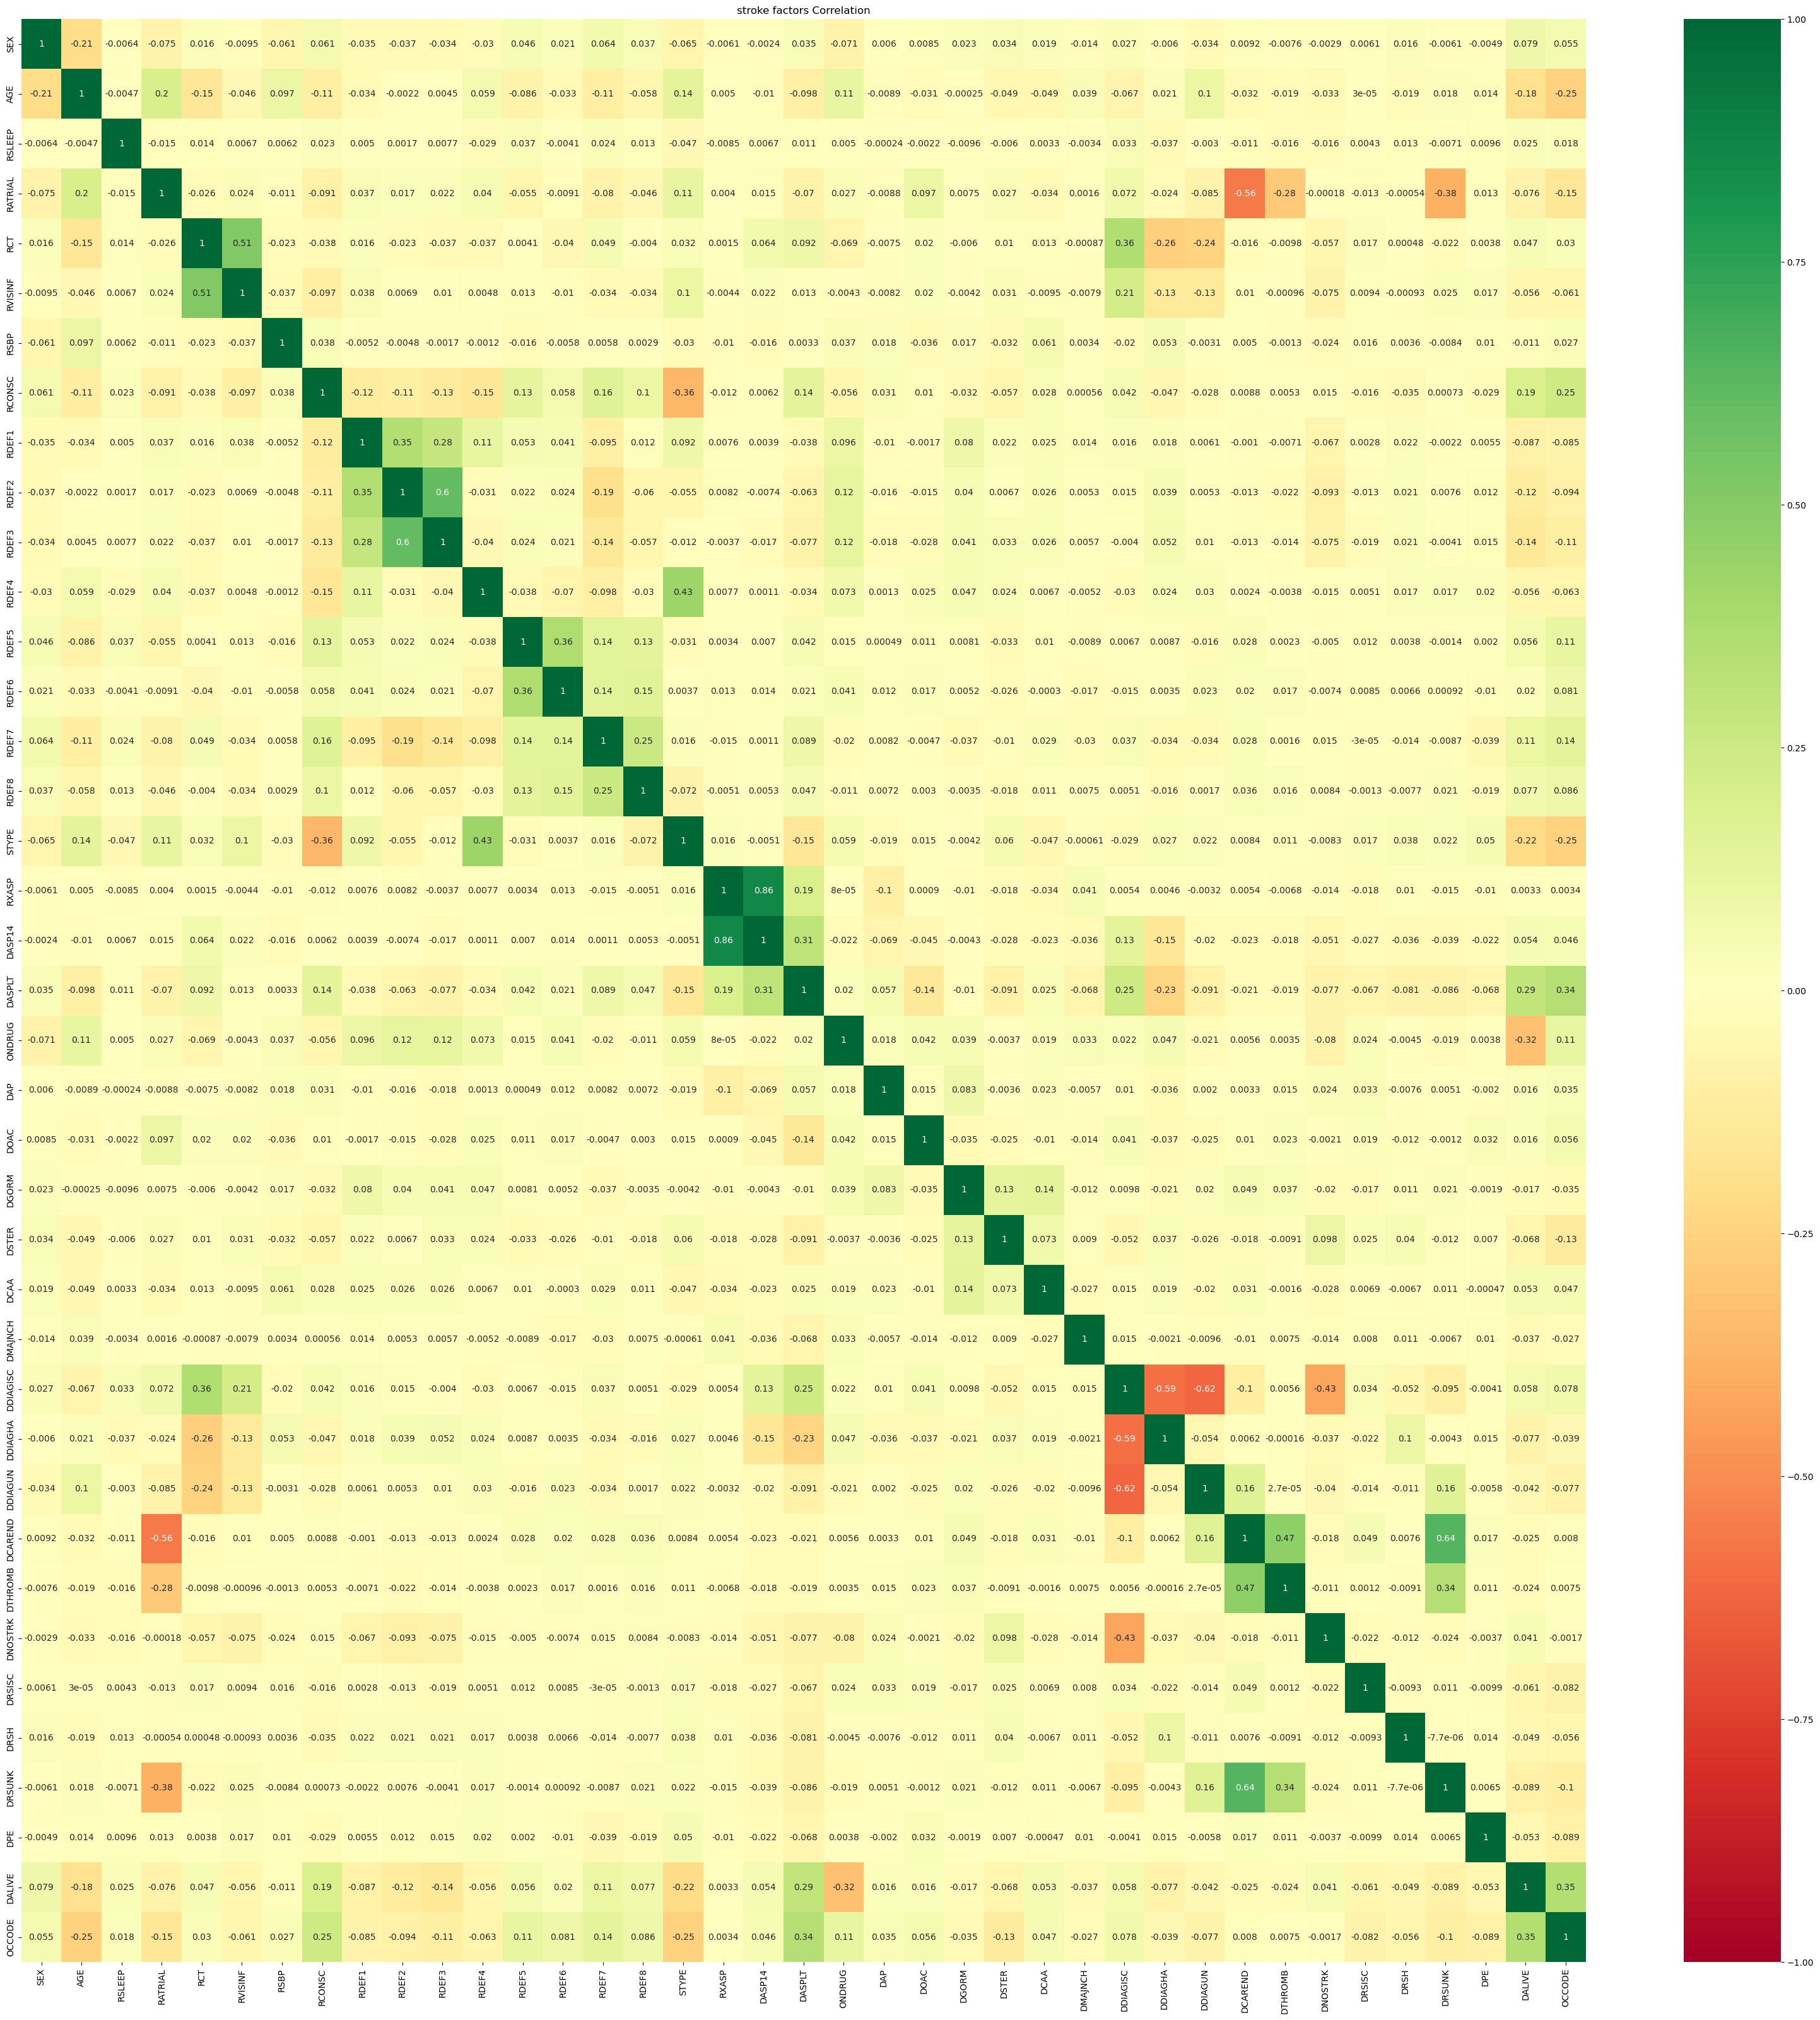

In [9]:
# Checking the correlation between all columns
corr_stroke_factors= stroke_trials_encoded_df[['SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RSBP', 'RCONSC',
       'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8',
       'STYPE', 'RXASP', 'DASP14', 'DASPLT', 'ONDRUG', 'DAP', 'DOAC', 'DGORM',
       'DSTER', 'DCAA', 'DMAJNCH', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DCAREND',
       'DTHROMB', 'DNOSTRK', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE',
       'DALIVE', 'OCCODE']].corr()
fig = plt.figure(figsize = (40,40))
sns.heatmap(corr_stroke_factors, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('stroke factors Correlation')
plt.show()


In [10]:
# Checking the correlation between OCCODE column and the rest ofcolumns
OCCODE_correlations = stroke_trials_encoded_df.corr()['OCCODE']
# Display correlation with other columns
print(OCCODE_correlations)

SEX         0.055243
AGE        -0.254838
RSLEEP      0.018303
RATRIAL    -0.151215
RCT         0.029669
RVISINF    -0.061440
RSBP        0.027131
RCONSC      0.246046
RDEF1      -0.085231
RDEF2      -0.093543
RDEF3      -0.108608
RDEF4      -0.062540
RDEF5       0.110886
RDEF6       0.081414
RDEF7       0.138509
RDEF8       0.085729
STYPE      -0.253791
RXASP       0.003427
DASP14      0.046035
DASPLT      0.341439
ONDRUG      0.113969
DAP         0.034555
DOAC        0.055643
DGORM      -0.035374
DSTER      -0.130655
DCAA        0.046919
DMAJNCH    -0.026812
DDIAGISC    0.077997
DDIAGHA    -0.039315
DHAEMD     -0.002285
DDIAGUN    -0.077485
DCAREND     0.007981
DTHROMB     0.007493
DNOSTRK    -0.001686
DRSISC     -0.081824
DRSH       -0.055689
DRSUNK     -0.104358
DPE        -0.088665
DALIVE      0.350237
CNTRYNUM   -0.066778
OCCODE      1.000000
Name: OCCODE, dtype: float64


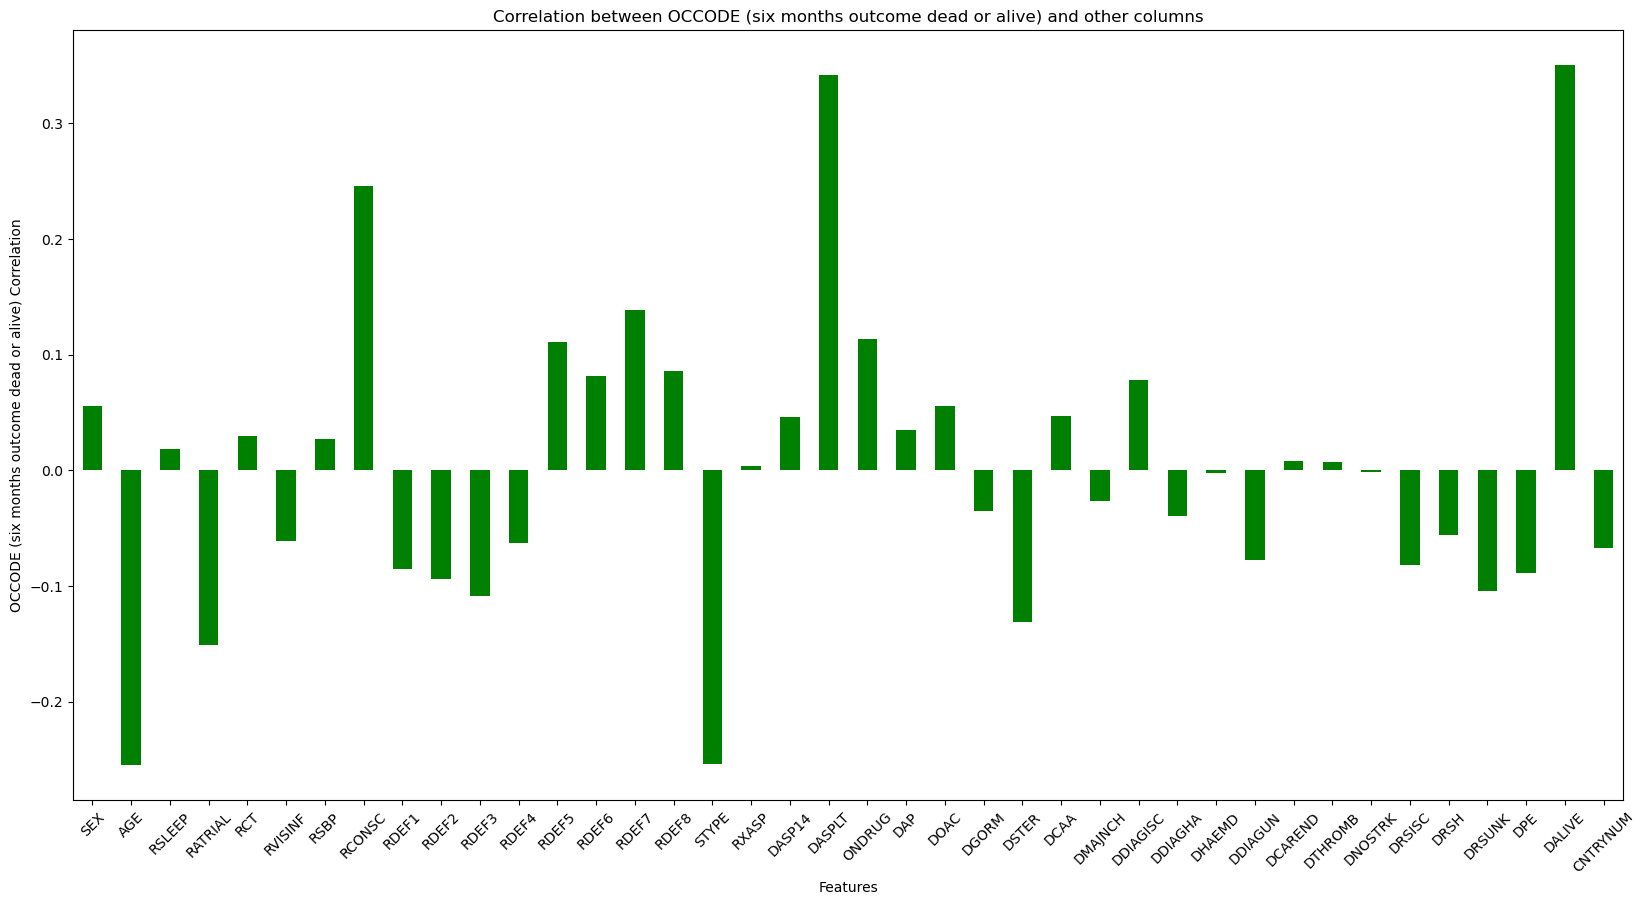

In [11]:
# Plotting the correlation between OCCODE column and the rest of columns
OCCODE_correlations.drop('OCCODE').plot(kind='bar', color ='green', figsize=(20, 10))
plt.xlabel('Features')
plt.ylabel('OCCODE (six months outcome dead or alive) Correlation')
plt.title('Correlation between OCCODE (six months outcome dead or alive) and other columns')
plt.xticks(rotation=45)
plt.show()

# Data analysis

## Models training and testing
  





In [12]:
# Generate models for the dataset and find the best one
model = util.stroke_model_generator(stroke_trials_encoded_df.copy(), 'OCCODE')

LogisticRegression()
Mean Squared Error: 0.1322175732217573
R-squared: 0.865530956821295
Balanced Accuracy: 0.7234145753715827
Accuracy: 0.8677824267782427
Cross Val Score: 0.24190001397802668

SVC()
Mean Squared Error: 0.13765690376569037
R-squared: 0.8599990025133102
Balanced Accuracy: 0.7115866449581844
Accuracy: 0.8623430962343096
Cross Val Score: 0.18035063919518532

KNeighborsClassifier()
Mean Squared Error: 0.1698744769874477
R-squared: 0.82723281161217
Balanced Accuracy: 0.6770863262307051
Accuracy: 0.8301255230125523
Cross Val Score: -0.08545781631275617

DecisionTreeClassifier()
Mean Squared Error: 0.18284518828451882
R-squared: 0.8140412282623604
Balanced Accuracy: 0.7098750938418144
Accuracy: 0.8171548117154812
Cross Val Score: -0.1888766310027302

RandomForestClassifier()
Mean Squared Error: 0.12677824267782425
R-squared: 0.8710629111292797
Balanced Accuracy: 0.7241040359446331
Accuracy: 0.8732217573221758
Cross Val Score: 0.20016853106915938

ExtraTreesClassifier()
Mean S

## Model Optimization : Training and Testing the Model (Gradient Boosting Classifier)
#### Hyperparameter Tuning

In [13]:
# Define features and target
X = stroke_trials_df.drop('OCCODE', axis=1)
y = stroke_trials_df['OCCODE']

In [14]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Encode the data
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [16]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [17]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the parameters
param_grid = {
    "learning_rate": [0.065, 0.075, 0.085],
    "max_depth":[3, 5],
    "subsample":[0.5, 1],
    "n_estimators":[250, 400]
}


In [19]:
# Create the GridSearchCV model
grid_tuned_model = GradientBoostingClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)

In [20]:
# Fit the GridSearchCV model
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.881 total time=   0.7s
[CV 2/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.868 total time=   0.7s
[CV 3/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.864 total time=   0.7s
[CV 4/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.861 total time=   0.7s
[CV 5/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=0.5;, score=0.877 total time=   0.7s
[CV 1/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.877 total time=   1.1s
[CV 2/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.865 total time=   1.1s
[CV 3/5] END learning_rate=0.065, max_depth=3, n_estimators=250, subsample=1;, score=0.865 total time=   1.1s
[CV 4/5] END learning_rate=0.065, max_depth=3, n

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.065, 0.075, 0.085],
                         'max_depth': [3, 5], 'n_estimators': [250, 400],
                         'subsample': [0.5, 1]},
             verbose=3)

In [21]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'learning_rate': 0.085, 'max_depth': 3, 'n_estimators': 250, 'subsample': 0.5}


In [22]:
# Get the score for the GridSearchCV model
grid_clf.score(X_test_scaled, y_test)

0.8769874476987448

In [23]:
# Check the metrics for the GridSearchCV model
util.check_metrics(X_test_scaled, y_test, grid_clf.best_estimator_)

Mean Squared Error: 0.12301255230125523
R-squared: 0.8748927256501922
Balanced Accuracy: 0.7404322541910862
Accuracy: 0.8769874476987448
Cross Val Score: 0.1854560026305316



0.8748927256501922

### Measuring Accuracy Using Cross-validation

In [24]:
# Importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# Calculate the accuracy for the model
cross_val_score = cross_val_score(grid_clf.best_estimator_, X_train_scaled, y_train, cv=3)
cross_val_score


array([0.86861925, 0.86150628, 0.86903766])

## Evaluate the Performance of the Model

#### Confusion Matrix

In [26]:
# Getting a clean prediction for each instance in the training set
y_train_pred = cross_val_predict(grid_clf.best_estimator_, X_train_scaled, y_train, cv=3)
y_train_pred


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [27]:
# Create the confusion matrix
confusion_matrix(y_train, y_train_pred, labels = [1,0])

array([[5353,  252],
       [ 708,  857]], dtype=int64)

#### Classification Report

In [28]:
# Create a classification report
print(classification_report(y_train, y_train_pred, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.88      0.96      0.92      5605
           0       0.77      0.55      0.64      1565

    accuracy                           0.87      7170
   macro avg       0.83      0.75      0.78      7170
weighted avg       0.86      0.87      0.86      7170

